In [1]:
import os
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import transforms   

device = "cuda" if torch.cuda.is_available() else "cpu"

# Dataset

In [2]:
import glob

dataset_root = "/mnt/d/backup/InSpaceType_all_sp8/home/InSpaceType" 

dataset = []
for seq in os.listdir(dataset_root): 
    sequence = os.path.join(dataset_root, seq) 

    images = sorted(glob.glob(sequence + "/*.jpg"))
    pmfs = sorted(glob.glob(sequence + "/*.pfm"))  

    for image, pmf in zip(images, pmfs): 
        dataset.append({
            'image':image, 
            'label':pmf
        })

# Torch Dataset

In [3]:
from data.torch_dataset import DepthDataset , Transform
from torch.utils.data import DataLoader 
from sklearn.model_selection import train_test_split 

train, val = train_test_split(dataset, train_size=0.8, random_state=20)

train_data = DepthDataset(train, Transform.train_transform)
val_data = DepthDataset(val, Transform.val_transform) 

In [ ]:
# Load 
train_data = torch.load('train_dataset.pth') 
train_loader = DataLoader(train_data, shuffle=True, batch_size=8) 

val_data = torch.load("val_dataset.pth")
val_loader = DataLoader(val_data, shuffle=False, batch_size=8)

In [6]:
torch.save(train_loader, 'train_dataset.pth')
torch.save(val_loader, "val_dataset.pth")

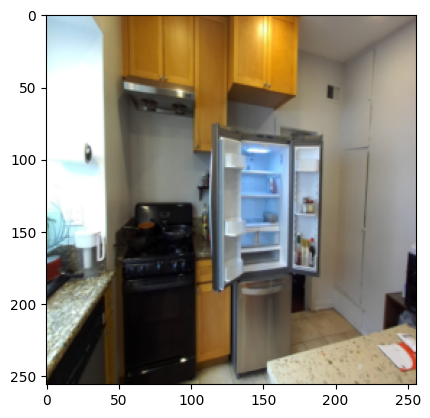

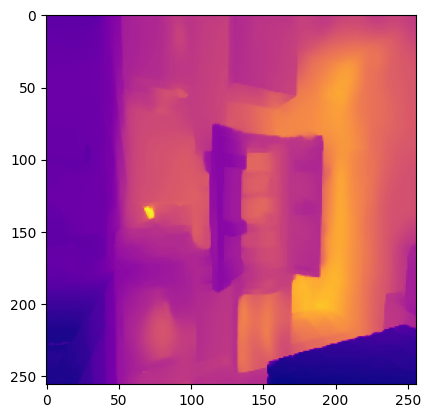

In [32]:
x, y = next(iter(val_loader))

idx = 1
sample_x = x[idx]
sample_x = sample_x.permute(1,2,0) 
sample_y = y[idx]

plt.imshow(sample_x) 
plt.show()

plt.imshow(sample_y, cmap='plasma') 
plt.show()

# Loss

In [33]:
from model.residual_ghost_net import ResidualGhostUNet
from torchmetrics.image import StructuralSimilarityIndexMeasure 

model = ResidualGhostUNet().to(device)
ssim = StructuralSimilarityIndexMeasure(data_range=1.0).to(device)

In [34]:
x = x.to(device)
y = y.to(device)

x.size(), y.size() 

(torch.Size([8, 3, 256, 256]), torch.Size([8, 256, 256]))

In [35]:
preds = model(x)  
targets = y.unsqueeze(1)

OutOfMemoryError: CUDA out of memory. Tried to allocate 128.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 14.35 GiB is allocated by PyTorch, and 117.45 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)